# Kaggle Bike Sharing Demand

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import sklearn
import seaborn as sns
from sklearn import linear_model
from sklearn import svm
#from sklearn import learning_curve
from sklearn import ensemble
from matplotlib.gridspec import GridSpec

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
df['date'] = pd.to_datetime(df['datetime'])

In [11]:
df.set_index('date',inplace=True)
df['month'] = df.index.month
df['hours'] = df.index.hour
df['dayofWeek'] = df.index.weekday

In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data,month,hours,dayofWeek
date,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,1,0,5
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,1,1,5
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,1,2,5
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,1,3,5
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,1,4,5


In [17]:
class mean_30():
    def __init__(self, df):
        self.df=df
    def mean_hours_min(self,h):
        a = self.df["hours"] == h
        return self.df[a]["count"].mean() 
    def transf(self, t):
        return self.mean_hours_min(t)
    def transfc(self, t):
        return self.err_hours_min(t)
    def vector_day(self):
        k = []
        for i in range(0,24):
            k.append(i)
        hour_day = pd.DataFrame()
        hour_day["A"] = k
        return hour_day["A"] 
    def view(self):
        plt.plot(self.vector_day().apply(self.transf))

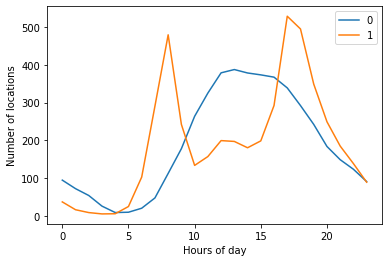

In [23]:
fig = plt.figure()
plt.ylabel('Number of locations')
plt.xlabel('Hours of day')
moy0 = mean_30(df[df['workingday']==0])
moy0.view()


moy1=mean_30(df[df['workingday']==1])
moy1.view()
plt.legend(['0','1'])
plt.show()



In [26]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [27]:
train[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [28]:
test[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [29]:
train_date = pd.DatetimeIndex(train['datetime'])
train['year'] = train_date.year
train['month'] = train_date.month
train['hour'] = train_date.hour
train['dayofWeek'] = train_date.dayofweek

In [30]:
train[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


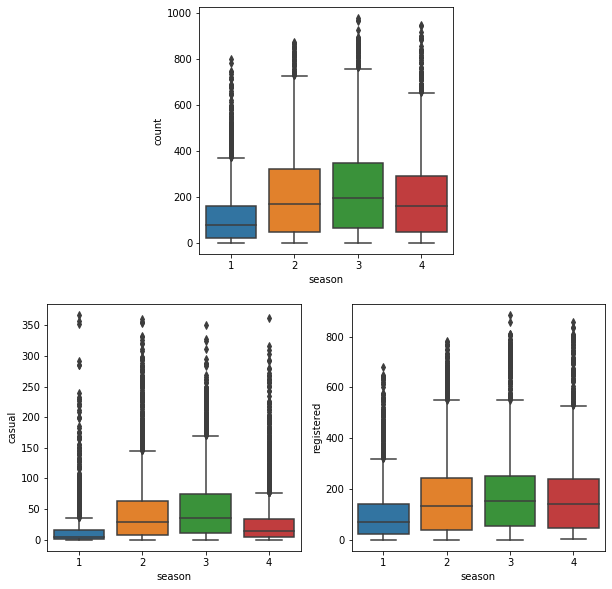

In [33]:
fig = plt.figure(figsize=(10,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.boxplot(x='season',y='count',data=train)
plt.subplot(gs1[2:,:2])
sns.boxplot(x='season',y='casual',data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='season',y='registered',data=train)
plt.show()

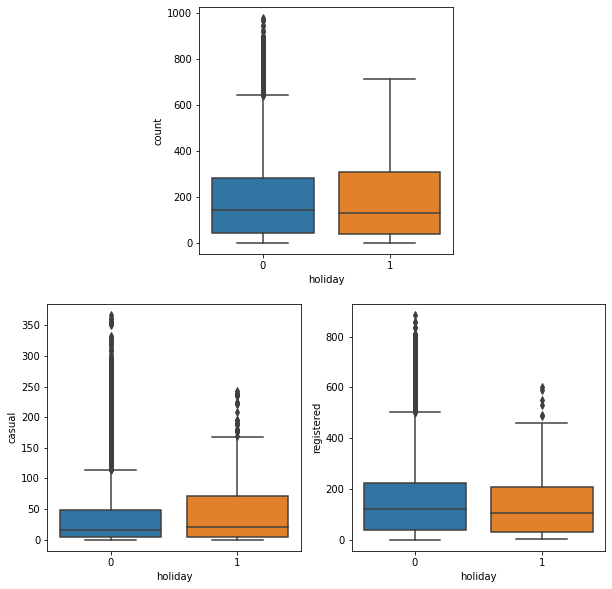

In [36]:
fig = plt.figure(figsize=(10,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.boxplot(x='holiday',y='count',data=train)
plt.subplot(gs1[2:,:2])
sns.boxplot(x='holiday',y='casual',data=train)
plt.subplot(gs1[2:,2:])
sns.boxplot(x='holiday',y='registered',data=train)
plt.show()

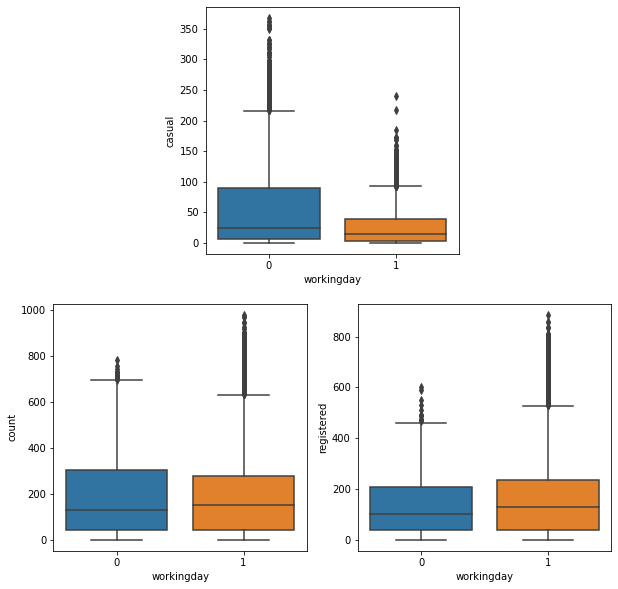

In [37]:
fig = plt.figure(figsize=(10,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.boxplot(x='workingday',y='casual',data=train)
plt.subplot(gs1[2:,:2])
sns.boxplot(x='workingday',y='count',data=train)
plt.subplot(gs1[2:,2:])
sns.boxplot(x='workingday',y='registered',data=train)
plt.show()

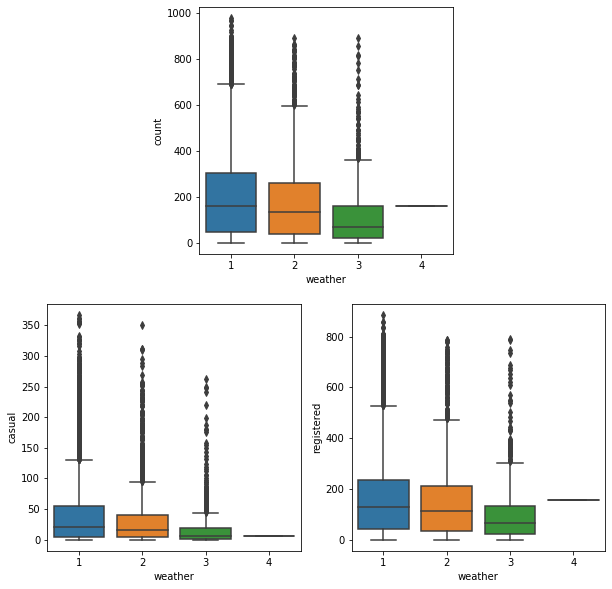

In [39]:
fig = plt.figure(figsize=(10,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.boxplot(x='weather',y='count',data=train)
plt.subplot(gs1[2:,:2])
sns.boxplot(x='weather',y='casual',data=train)
plt.subplot(gs1[2:,2:])
sns.boxplot(x='weather',y='registered',data=train)
plt.show()

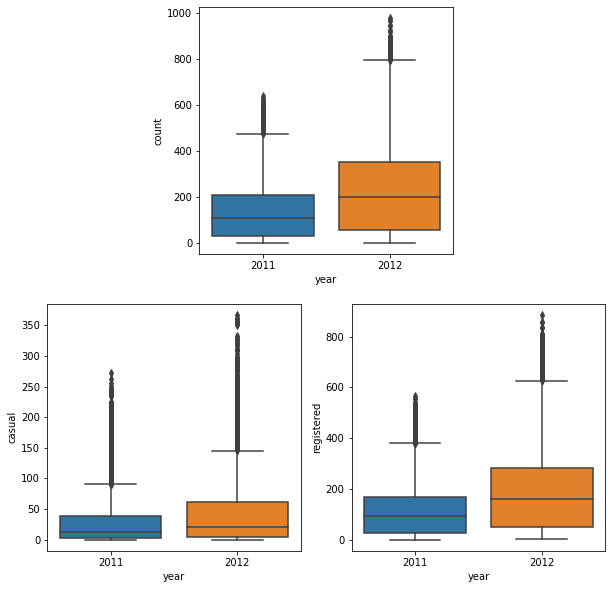

In [40]:
fig = plt.figure(figsize=(10,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.boxplot(x='year',y='count',data=train)
plt.subplot(gs1[2:,:2])
sns.boxplot(x='year',y='casual',data=train)
plt.subplot(gs1[2:,2:])
sns.boxplot(x='year',y='registered',data=train)
plt.show()

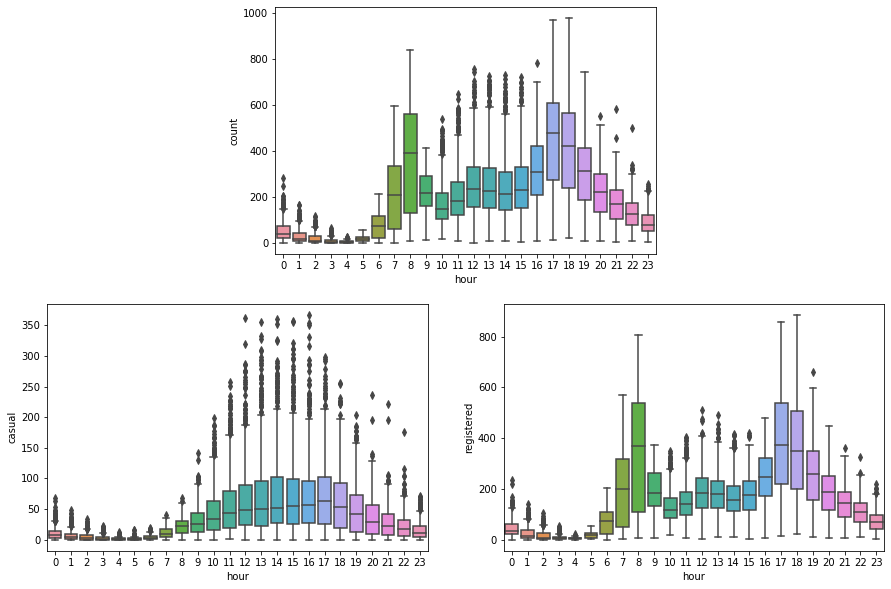

In [41]:
fig = plt.figure(figsize=(15,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.boxplot(x='hour',y='count',data=train)
plt.subplot(gs1[2:,:2])
sns.boxplot(x='hour',y='casual',data=train)
plt.subplot(gs1[2:,2:])
sns.boxplot(x='hour',y='registered',data=train)
plt.show()

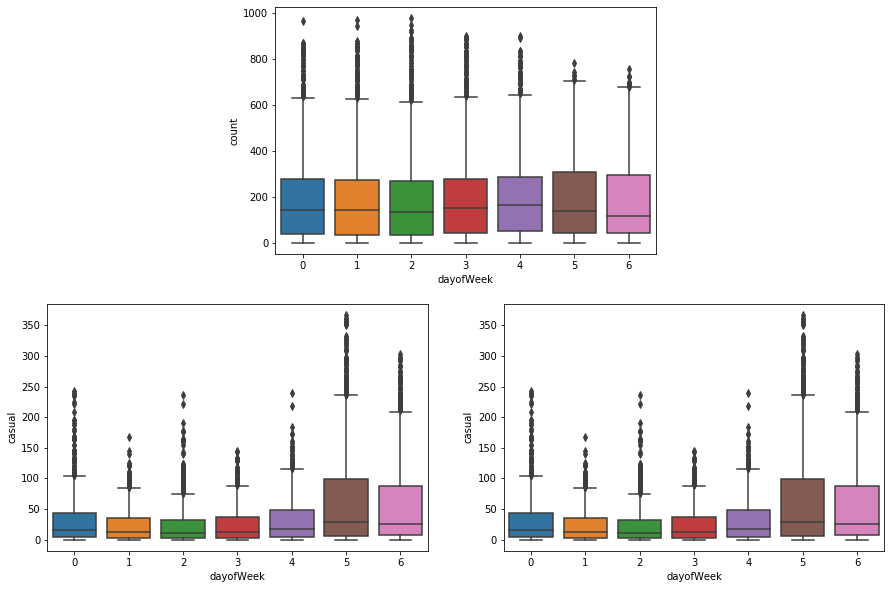

In [43]:
fig = plt.figure(figsize=(15,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.boxplot(x='dayofWeek',y='count',data=train)
plt.subplot(gs1[2:,:2])
sns.boxplot(x='dayofWeek',y='casual',data=train)
plt.subplot(gs1[2:,2:])
sns.boxplot(x='dayofWeek',y='casual',data=train)
plt.show()

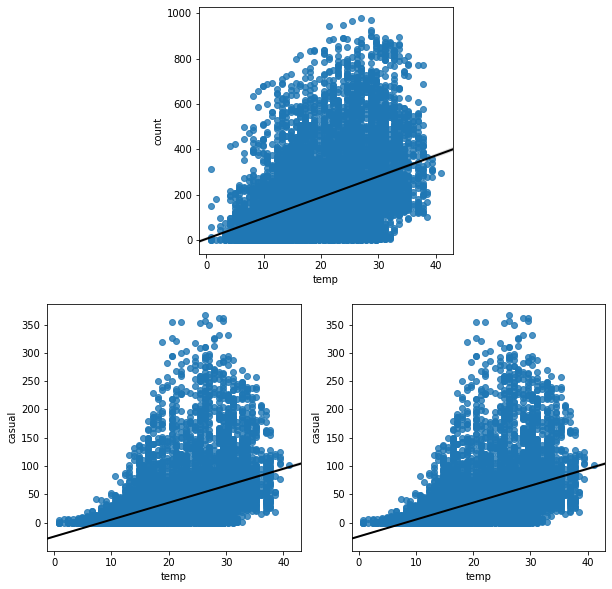

In [44]:
fig = plt.figure(figsize=(10,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.regplot(x='temp',y='count',data=train,
           line_kws={'color':'black','linewidth':2})
plt.subplot(gs1[2:,:2])
sns.regplot(x='temp',y='casual',data=train,
           line_kws={'color':'black','linewidth':2})
plt.subplot(gs1[2:,2:])
sns.regplot(x='temp',y='casual',data=train,
           line_kws={'color':'black','linewidth':2})
plt.show()

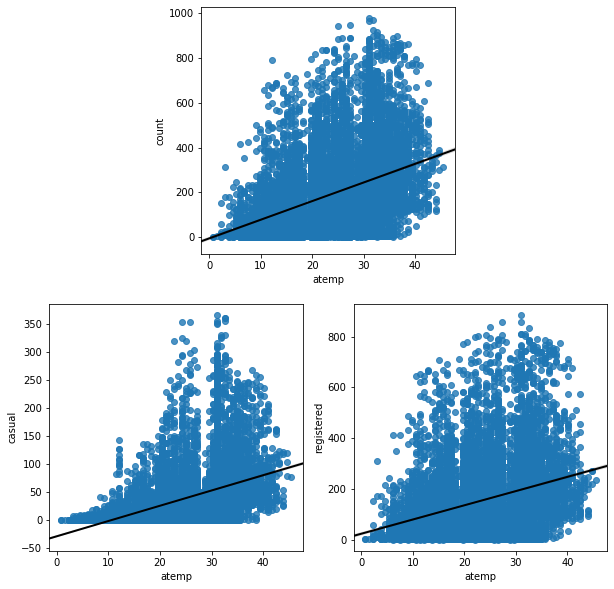

In [46]:
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='atemp', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='atemp', y='casual', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='atemp', y='registered', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.show()

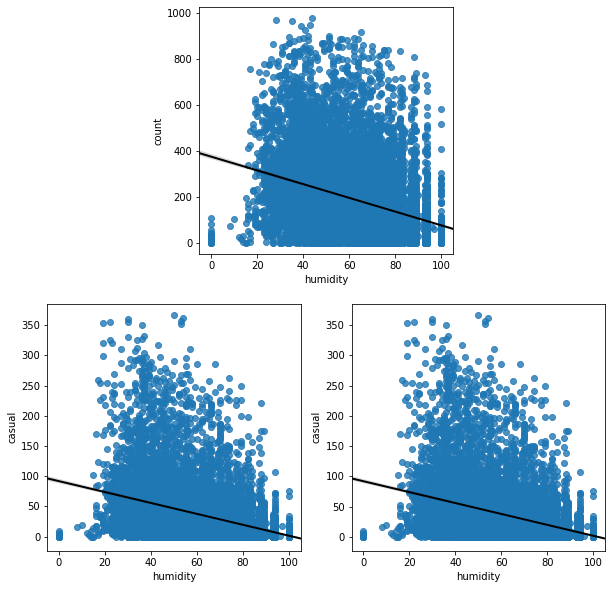

In [47]:
fig = plt.figure(figsize=(10,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.regplot(x='humidity',y='count',data=train
           ,line_kws={"color":'black','linewidth':2})
plt.subplot(gs1[2:,:2])                
sns.regplot(x='humidity',y='casual',data=train,
           line_kws={'color':'black','linewidth':2})
plt.subplot(gs1[2:,2:])
sns.regplot(x='humidity',y='casual',data=train,
           line_kws={'color':'black','linewidth':2})
plt.show()

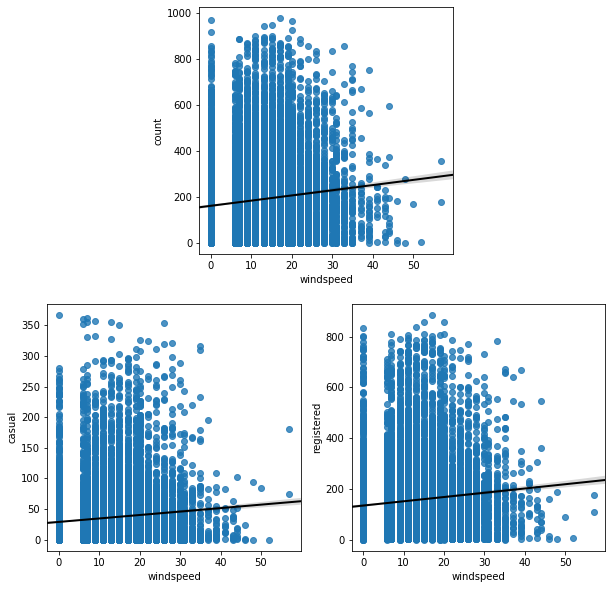

In [48]:
fig = plt.figure(figsize=(10,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.regplot(x='windspeed',y='count',data=train,
           line_kws={"color":"black","linewidth":2})
plt.subplot(gs1[2:,:2])
sns.regplot(x='windspeed',y='casual',data=train
           ,line_kws={"color":"black","linewidth":2})
plt.subplot(gs1[2:,2:])
sns.regplot(x='windspeed',y='registered',data=train,
           line_kws={"color":"black","linewidth":2})
plt.show()

In [49]:
from matplotlib.gridspec import GridSpec

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

transfer the targer from x to log(x +1)

In [51]:
for col in ['casual','registered','count']:
    train['%s_log'% col] = np.log(train[col]+1)

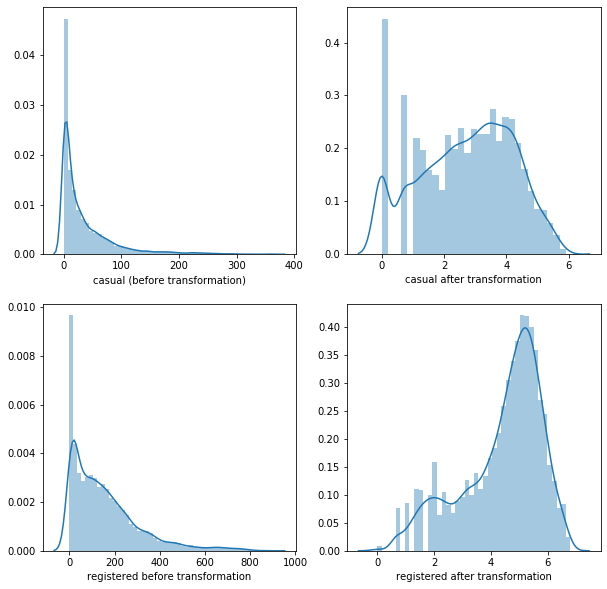

In [52]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(train['casual'])
plt.xlabel('casual (before transformation)')
plt.subplot(222)
sns.distplot(np.log(train['casual'] +1))
plt.xlabel('casual after transformation')
plt.subplot(223)
sns.distplot(train['registered'])
plt.xlabel('registered before transformation')
plt.subplot(224)
sns.distplot(np.log(train['registered']+1))
plt.xlabel("registered after transformation")
plt.show()

extract information from timestamp

In [53]:
train_date = pd.DatetimeIndex(train['datetime'])
train['year'] = train_date.year
train['month'] = train_date.month
train['hour'] = train_date.hour
train['dayofWeek'] = train_date.dayofweek
test_date = pd.DatetimeIndex(test['datetime'])
test['year'] = test_date.year
test['month'] = test_date.month
test['hour'] = test_date.hour
test['dayofWeek'] = test_date.dayofweek

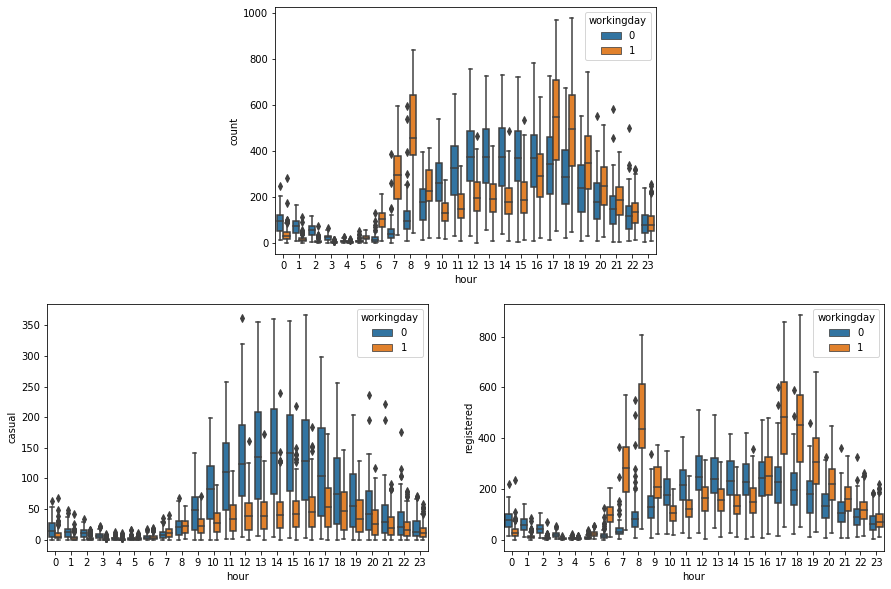

In [54]:
fig = plt.figure(figsize=(15,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.boxplot(x='hour',y='count',hue='workingday',data=train)
plt.subplot(gs1[2:,:2])
sns.boxplot(x='hour',y='casual',hue='workingday',data=train)
plt.subplot(gs1[2:,2:])
sns.boxplot(x='hour',y='registered',hue='workingday',data=train)
plt.show()

combine year and season

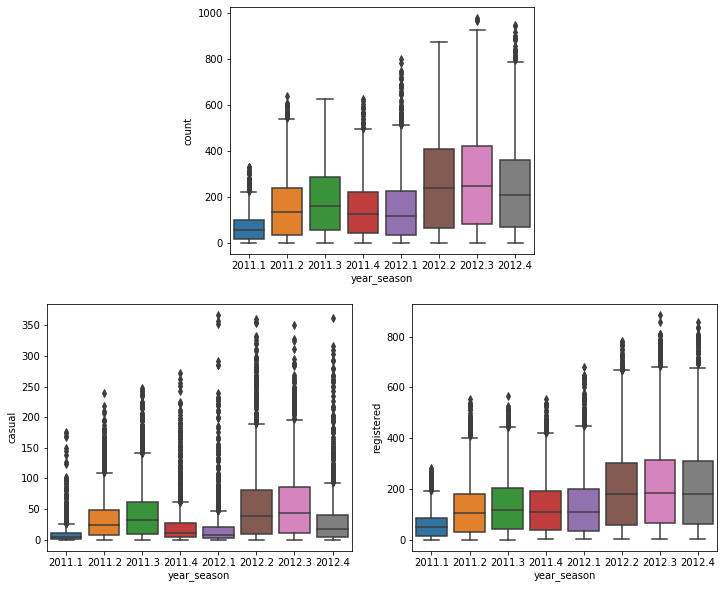

In [58]:
train['year_season'] = train_date.year + train.season /10
fig = plt.figure(figsize=(12,10))
gs1 = GridSpec(4,4,fig,wspace=0.5,hspace=0.5)
plt.subplot(gs1[:2,1:3])
sns.boxplot(x='year_season',y='count',data=train)
plt.subplot(gs1[2:,:2])
sns.boxplot(x='year_season',y='casual',data=train)
plt.subplot(gs1[2:,2:])
sns.boxplot(x='year_season',y='registered',data=train)
plt.show()

In [60]:
for df in [train, test]:
    df['year_season'] = df['year'] + df['season'] / 10
    df['hour_workingday_casual'] = df[['hour', 'workingday']].apply(
        lambda x: int(10 <= x['hour'] <= 19), axis=1)
    df['hour_workingday_registered'] = df[['hour', 'workingday']].apply(
      lambda x: int(
        (x['workingday'] == 1 and (x['hour'] == 8 or 17 <= x['hour'] <= 18))
        or (x['workingday'] == 0 and 10 <= x['hour'] <= 19)), axis=1)

by_season = train.groupby('year_season')[['count']].median()
by_season.columns = ['count_season']
train = train.join(by_season, on='year_season')
test = test.join(by_season, on='year_season')

# Gradient Boosting Regressor

In [61]:
features = ['season','holiday','workingday','weather',
           'temp','atemp','humidity','windspeed',
           'year','hour','dayofWeek','hour_workingday_casual','count_season']

reg = GradientBoostingRegressor(n_estimators=1000,min_samples_leaf = 6,random_state=0)
reg.fit(train[features],train['casual_log'])
pred_casual = reg.predict(test[features])
pred_casual = np.exp(pred_casual) - 1
pred_casual[pred_casual <0]  =0
features =['season','holiday','workingday','weather',
          'temp','atemp','humidity','windspeed',
          'year','hour','dayofWeek','hour_workingday_casual','count_season']
reg = GradientBoostingRegressor(n_estimators=1000,min_samples_leaf=6,random_state=0)
reg.fit(train[features], train['registered_log'])
pred_registered = reg.predict(test[features])
pred_registered = np.exp(pred_registered) - 1
pred_registered[pred_registered <0] =0
pred1 = pred_casual + pred_registered

In [62]:
submission = pd.DataFrame({'datetime':test.datetime,'count':pred1},
                         columns=['datetime','count'])
submission.to_csv("submission.csv",index=False)

Larger n_estimators is better

In [63]:
def plot_cv(param,bestreg,variable):
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.plot(param[variable],bestreg.cv_results_['mean_test_score'],'o-')
    plt.xlabel(variable)
    plt.ylabel('score mean')
    plt.subplot(122)
    plt.plot(param[variable],bestreg.cv_results_['std_test_score'],'o-')
    plt.xlabel(variable)
    plt.ylabel("score std")
    plt.tight_layout()
    plt.show()

{'n_estimators': 1000}


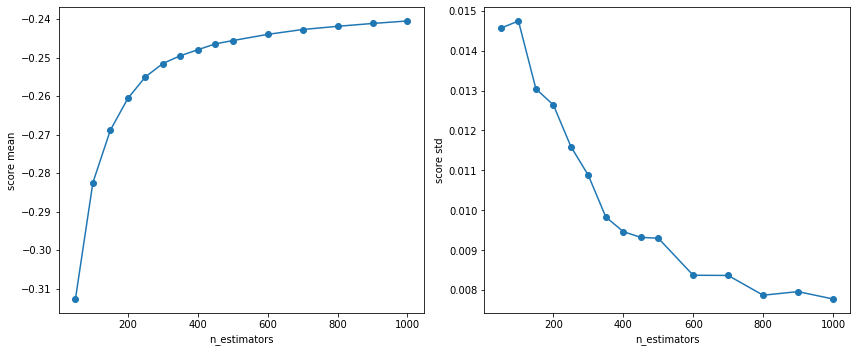

{'n_estimators': 1000}


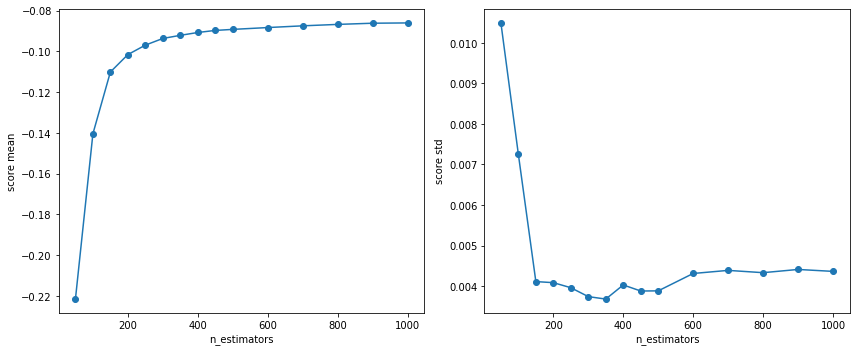

In [67]:
year_month = train['year']* 100 + train['month']
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)

reg = GradientBoostingRegressor(random_state=0)
param = {"n_estimators":[50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]}
bestreg = GridSearchCV(reg,param,cv=kf.split(train,year_month),scoring='neg_mean_squared_error')
bestreg.fit(train[features],train['casual_log'])
print(bestreg.best_params_)
plot_cv(param,bestreg,"n_estimators")

reg = GradientBoostingRegressor(random_state=0)
param = {"n_estimators":[50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]}
bestreg = GridSearchCV(reg,param,cv=kf.split(train,year_month),scoring='neg_mean_squared_error')
bestreg.fit(train[features],train['registered_log'])
print(bestreg.best_params_)
plot_cv(param,bestreg,"n_estimators")

# Gradient Boosting Regressor tune min_samples_leafs 

In [68]:
features =['season', 'holiday', 'workingday', 'weather',
            'temp', 'atemp', 'humidity', 'windspeed',
            'year', 'hour', 'dayofWeek', 'hour_workingday_casual', 'count_season']
reg = RandomForestRegressor(n_estimators=1000,min_samples_leaf=2,random_state=0,n_jobs=-1)
reg.fit(train[features],train['casual_log'])
pred_casual = reg.predict(test[features])
pred_casual = np.exp(pred_casual) - 1
pred_casual[pred_casual <0] = 0
features =['season', 'holiday', 'workingday', 'weather',
            'temp', 'atemp', 'humidity', 'windspeed',
            'year', 'hour', 'dayofWeek', 'hour_workingday_casual', 'count_season']

reg = RandomForestRegressor(n_estimators=1000,min_samples_leaf=2,random_state=0,
                           n_jobs=-1)
reg.fit(train[features],train['registered_log'])
pred_registered = reg.predict(test[features])
pred_registered = np.exp(pred_registered) - 1
pred_registered[pred_registered <0] =0

pred2 = pred_casual + pred_registered

In [70]:
submission = pd.DataFrame({'datetime':test.datetime,'count':pred2},
                         columns=['datetime','count'])
submission.to_csv('submission2.csv',index=False)

In [71]:
def plot_cv(param,bestreg,variable):
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.plot(param[variable],bestreg.cv_results_['mean_test_score'],'o-')
    plt.xlabel(variable)
    plt.ylabel('score mean')
    plt.subplot(122)
    plt.plot(param[variable],bestreg.cv_results_['std_test_score'],'o-')
    plt.xlabel(variable)
    plt.ylabel('score std')
    plt.tight_layout()
    plt.show()

# Random ForestRegressor

{'n_estimators': 1000}


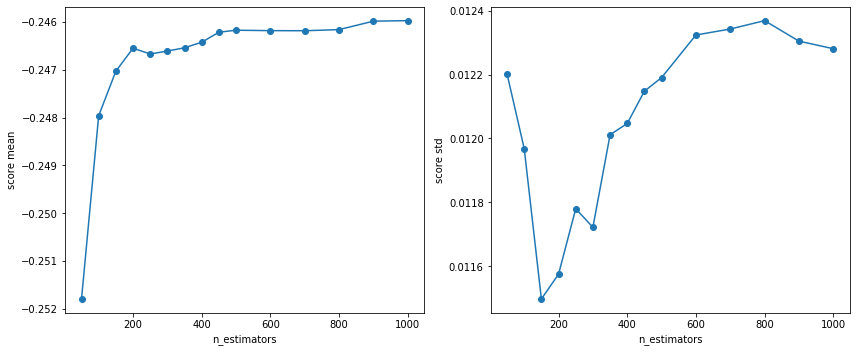

{'n_estimators': 900}


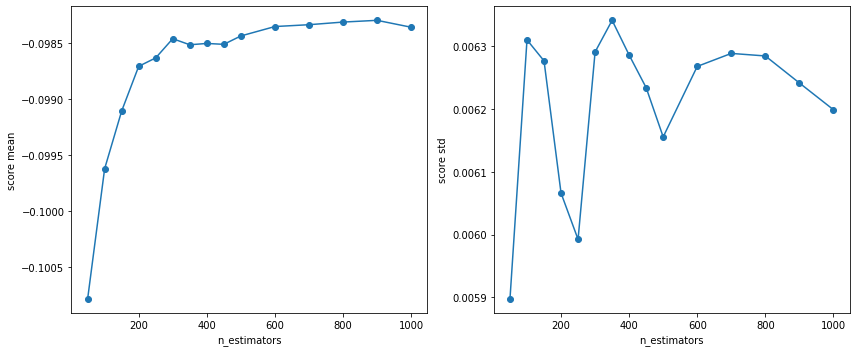

In [72]:
year_month = train['year'] *100  + train['month']
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)

reg = RandomForestRegressor(random_state=0,n_jobs=-1)
param ={"n_estimators":[50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]}
bestreg = GridSearchCV(reg,param,cv=kf.split(train,year_month),scoring='neg_mean_squared_error')
bestreg.fit(train[features],train['casual_log'])
print(bestreg.best_params_)
plot_cv(param,bestreg,"n_estimators")

reg = RandomForestRegressor(random_state=0,n_jobs=-1)
param={"n_estimators":[50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]}
bestreg = GridSearchCV(reg,param,cv=kf.split(train,year_month),scoring='neg_mean_squared_error')
bestreg.fit(train[features],train['registered_log'])
print(bestreg.best_params_)
plot_cv(param,bestreg,"n_estimators")

# Random Forest Regressor Tune min_samples_leaf

{'min_samples_leaf': 2}


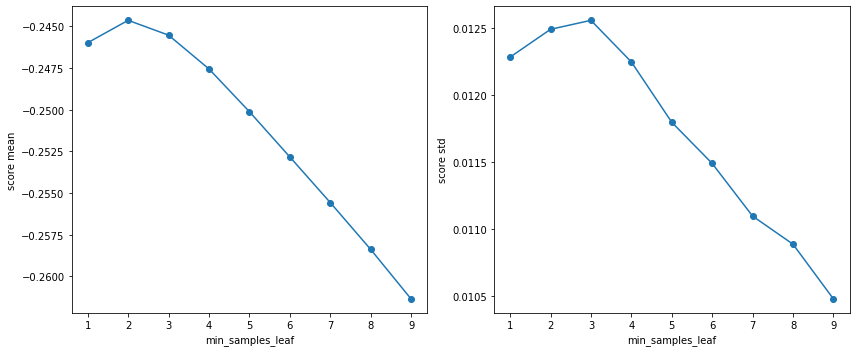

{'min_samples_leaf': 1}


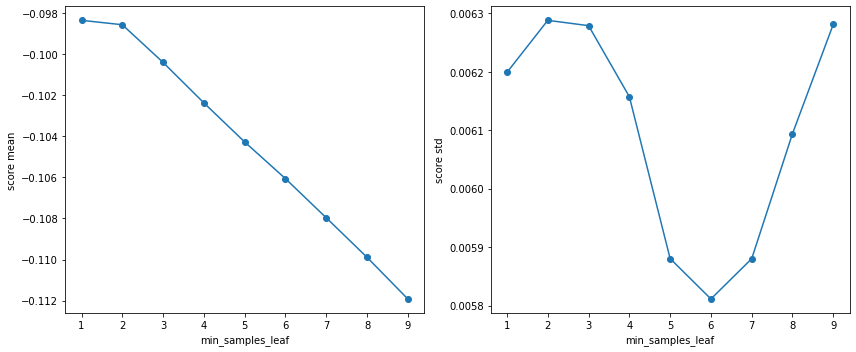

In [73]:
reg = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=-1)
param ={'min_samples_leaf':np.arange(1,10,1)}
bestreg = GridSearchCV(reg,param,cv=kf.split(train,year_month),scoring='neg_mean_squared_error')
bestreg.fit(train[features],train['casual_log'])
print(bestreg.best_params_)
plot_cv(param,bestreg,"min_samples_leaf")

reg = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=-1)
param= {'min_samples_leaf':np.arange(1,10,1)}
bestreg = GridSearchCV(reg,param,cv=kf.split(train,year_month),scoring='neg_mean_squared_error')
bestreg.fit(train[features],train['registered_log'])
print(bestreg.best_params_)
plot_cv(param,bestreg,"min_samples_leaf")

put the two models together

In [74]:
pred = 0.5 * pred1 + 0.5 * pred2
submission = pd.DataFrame({'datetime':test.datetime,'count':pred},
                         columns =['datetime','count'])
submission.to_csv("submission3.csv",index=False)

higher weight for better model

In [75]:
pred = 0.7 * pred1 + 0.7 * pred2
submission = pd.DataFrame({'datetime':test.datetime,'count':pred},
                         columns=['datetime','count'])
submission.to_csv("submission4.csv",index=False)

put two models together it will produce the better results

In [81]:
def RMLSE(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log(y_true + 1) - np.log(y_pred + 1))))

year_month = train['year'] * 100 + train['month']
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
results1, results2 = [], []
results3, results4, results5, results6 = [], [], [], []
for train_ind, test_ind in kf.split(train, year_month):
    cur_train = train.iloc[train_ind, :]
    cur_test = train.iloc[test_ind, :]
    features = ['season', 'holiday', 'workingday', 'weather',
                'temp', 'atemp', 'humidity', 'windspeed',
                'year', 'hour', 'dayofWeek', 'hour_workingday_casual', 'count_season']
    reg = GradientBoostingRegressor(n_estimators=1000, min_samples_leaf=6, random_state=0)
    reg.fit(cur_train[features], cur_train['casual_log'])
    pred_casual = reg.predict(cur_test[features])
    pred_casual = np.exp(pred_casual) - 1
    pred_casual[pred_casual < 0] = 0
    features = ['season', 'holiday', 'workingday', 'weather',
                'temp', 'atemp', 'humidity', 'windspeed',
                'year', 'hour', 'dayofWeek', 'hour_workingday_registered', 'count_season']
    reg = GradientBoostingRegressor(n_estimators=1000, min_samples_leaf=6, random_state=0)
    reg.fit(cur_train[features], cur_train['registered_log'])
    pred_registered = reg.predict(cur_test[features])
    pred_registered = np.exp(pred_registered) - 1
    pred_registered[pred_registered < 0] = 0
    pred1 = pred_casual + pred_registered
    results1.append(RMLSE(cur_test['count'], pred1))

    features = ['season', 'holiday', 'workingday', 'weather',
                'temp', 'atemp', 'humidity', 'windspeed',
                'year', 'hour', 'dayofWeek', 'hour_workingday_casual', 'count_season']
    reg = RandomForestRegressor(n_estimators=1000, min_samples_leaf=2, random_state=0, n_jobs=-1)
    reg.fit(cur_train[features], cur_train['casual_log'])
    pred_casual = reg.predict(cur_test[features])
    pred_casual = np.exp(pred_casual) - 1
    pred_casual[pred_casual < 0] = 0
    features = ['season', 'holiday', 'workingday', 'weather',
                'temp', 'atemp', 'humidity', 'windspeed',
                'year', 'hour', 'dayofWeek', 'hour_workingday_registered', 'count_season']
    reg = RandomForestRegressor(n_estimators=1000, min_samples_leaf=2, random_state=0, n_jobs=-1)
    reg.fit(cur_train[features], cur_train['registered_log'])
    pred_registered = reg.predict(cur_test[features])
    pred_registered = np.exp(pred_registered) - 1
    pred_registered[pred_registered < 0] = 0
    pred2 = pred_casual + pred_registered
    results2.append(RMLSE(cur_test['count'], pred2))

    pred = 0.5 * pred1 + 0.5 * pred2
    results3.append(RMLSE(cur_test['count'], pred))
    pred = 0.6 * pred1 + 0.4 * pred2
    results4.append(RMLSE(cur_test['count'], pred))
    pred = 0.7 * pred1 + 0.3 * pred2
    results5.append(RMLSE(cur_test['count'], pred))
    pred = 0.8 * pred1 + 0.2 * pred2
    results6.append(RMLSE(cur_test['count'], pred))

print("GBDT", np.mean(results1))
print("RF", np.mean(results2))
print("0.5 * GBDT + 0.5 * RF", np.mean(results3))
print("0.6 * GBDT + 0.4 * RF", np.mean(results4))
print("0.7 * GBDT + 0.3 * RF", np.mean(results5))
print("0.8 * GBDT + 0.2 * RF", np.mean(results6))

GBDT 0.295390089239367
RF 0.3058594854866956
0.5 * GBDT + 0.5 * RF 0.28825364795192054
0.6 * GBDT + 0.4 * RF 0.28749971943673996
0.7 * GBDT + 0.3 * RF 0.28775295930790856
0.8 * GBDT + 0.2 * RF 0.28907961501747315
